In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("FSI.xlsx")
data

,Date,FSI
0,2003-01-01,-0.5924
1,2003-02-01,-0.4264
2,2003-03-01,-0.8631
3,2003-04-01,-0.7705
4,2003-05-01,-1.1545
...,...,...
243,2023-04-01,-1.3425
244,2023-05-01,-1.3274
245,2023-06-01,-1.6747
246,2023-07-01,-2.0001


In [8]:
from scipy.interpolate import CubicSpline

def cubic_spline(df):
    #Performing Cubic Spline Interpolation
    df['MonthIndex'] = np.arange(len(df))  
    weekly_dates = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='W') 
    weekly_indices = np.linspace(0, len(df) - 1, num=len(weekly_dates))
    cubic_spline = CubicSpline(df['MonthIndex'], df["FSI"])
    weekly_prices_spline = cubic_spline(weekly_indices)
    weekly_df_spline = pd.DataFrame({'Date': weekly_dates, 'Weekly FSI': weekly_prices_spline})
    return weekly_df_spline

In [9]:
weekly_fsi = cubic_spline(data)

In [10]:
weekly_fsi

,Date,Weekly FSI
0,2003-01-05,-0.592400
1,2003-01-12,-0.409188
2,2003-01-19,-0.329398
3,2003-01-26,-0.331653
4,2003-02-02,-0.394577
...,...,...
1069,2023-07-02,-2.000011
1070,2023-07-09,-1.963405
1071,2023-07-16,-1.863643
1072,2023-07-23,-1.689112


In [17]:
def plot_spline(df, weekly_df):
    plt.figure(figsize=(12,6))
    # Original Monthly Data
    plt.plot(df['Date'], df['FSI'], 'go-', label='Monthly Data')
    # Cubic Spline Interpolation
    plt.plot(weekly_df['Date'], weekly_fsi['Weekly FSI'], 'r-', label='Cubic Spline Interpolation')
    # Formatting
    plt.xlabel('Date')
    plt.ylabel('FSI')
    plt.title('Cubic Spline Interpolation')
    plt.legend()
    plt.grid()
    plt.show()

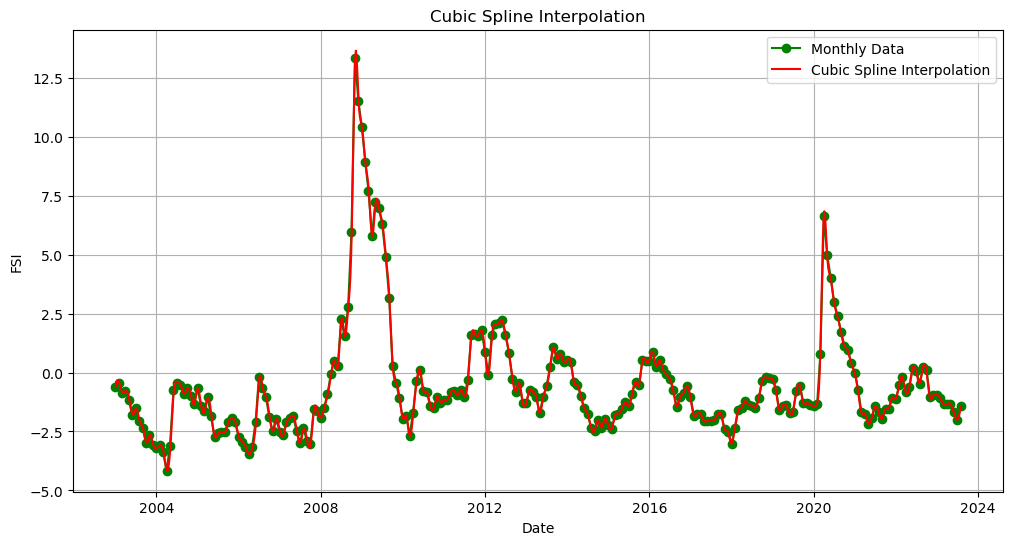

In [18]:
plot_spline(data,weekly_fsi)